In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_json('flipkart_fashion_products_dataset.json')
df

fix date column

In [ ]:
# df['crawled_at'] = pd.to_datetime(df['crawled_at'], unit='s')

group data

In [ ]:
total_brands = df['brand'].nunique() # counts the number of unique values in the brand column
total_categories = df['category'].nunique() # counts the number of unique values in the product_category_tree column

In [ ]:
print(f'Total number of brands: {total_brands}')
print(f'Total number of categories: {total_categories}')

In [ ]:
sorted(df['brand'].unique()) # lists all the unique values in the brand column

In [ ]:
# value_counts
df['brand'].value_counts() # counts the number of times each brand appears in the brand column

In [ ]:
df['out_of_stock'].value_counts()

In [ ]:
df['out_of_stock'].value_counts().plot(kind='pie',
                                    figsize=(3, 3), 
                                    autopct='%1.1f%%', 
                                    labels=['In Stock', 'Out of Stock'],
                                    ylabel='',
                                    title='Percentage of products in stock')

In [ ]:
bar_graph = df['brand'].value_counts().head(25).plot(kind='bar',
                                figsize=(15, 5),
                                title='Number of products by brand')
bar_graph.set_xlabel('Brand')
bar_graph.set_ylabel('Number of products')

In [ ]:
def clean_price(price):
    if price is None:
        return np.nan
    elif isinstance(price, str):
        price = price.replace(',', '')
        if price:
            price = float(price)
        else:
            price = np.nan
        return price
    else:
        return price
    
df['selling_price'] = df['selling_price'].apply(clean_price)
df['actual_price'] = df['actual_price'].apply(clean_price)

In [ ]:
df.groupby('category')['selling_price'].mean()

In [ ]:
seller_data = df.groupby('seller')['selling_price'].mean().reset_index()
seller_data.sort_values('selling_price', ascending=False).head(25)

In [ ]:
df.groupby('out_of_stock')[['selling_price','actual_price']].mean()

In [ ]:
df.groupby('out_of_stock')['selling_price'].agg(['mean', 'median', 'std'])

<Axes: xlabel='out_of_stock'>

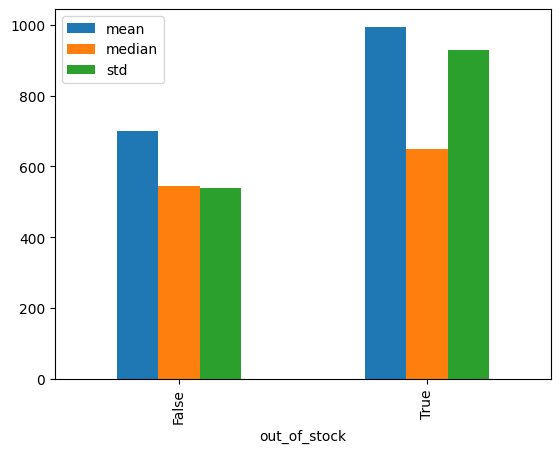

In [64]:
df.groupby('out_of_stock')['selling_price'].agg(['mean', 'median', 'std']).plot(kind='bar')

pivot

In [67]:
pd.pivot_table(df, index='category', columns='out_of_stock', values='selling_price', aggfunc='mean')

out_of_stock,False,True
category,,
"Bags, Wallets & Belts",258.512195,NaN
Clothing and Accessories,707.413730,994.705610
Footwear,495.826844,980.454545
Toys,189.000000,NaN


<Axes: xlabel='category'>

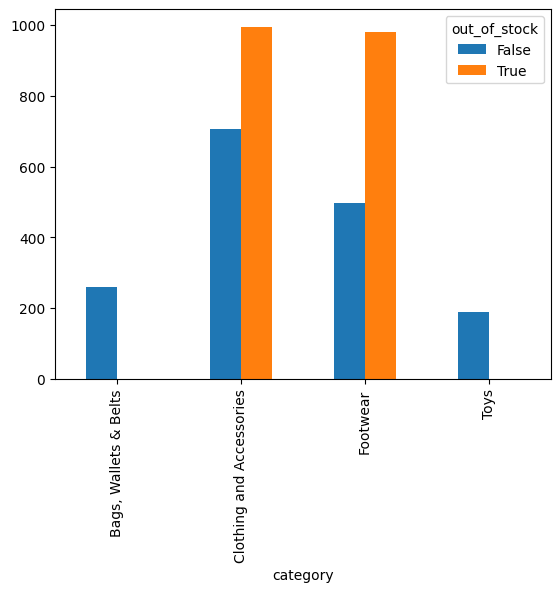

In [70]:
pd.pivot_table(df, index='category', columns='out_of_stock', values='selling_price', aggfunc='mean').plot(kind='bar')